<a href="https://colab.research.google.com/github/ancastillar/Aplicacion_deteccion_riesgo_inmuebles_Davivienda/blob/main/BRP_Davivienda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install lifelines
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install chart_studio

     |████████████████████████████████| 348kB 9.3MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp36-none-any.whl size=4035 sha256=3e5bab295c25ba1ecb8bb2c170b0ca7fde531405df33995d09cab4e816b3abf9
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma
     / 51.7MB 738kB/s
     |████████████████████████████████| 81kB 3.8MB/s 
     |████████████████████████████████| 604kB 16.3MB/s 
     |████████████████████████████████| 3.1MB 28.0MB/s 
     |████████████████████████████████| 71kB 9.8MB/s 
     |████████████████████████████████| 296kB 18.8MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=232425 sha256=3d30a7faa99274a51cba72d31545d4264861e911453fb020f364570c060bcdee
  Stored in directory: /tmp/pip-ephem-wheel-cache-yxawxzdg/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=

In [4]:
!pip install dash_core_components

     |████████████████████████████████| 3.5MB 8.6MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-1.14.1-cp36-none-any.whl size=3525927 sha256=bbff8bb78274cc0ee9f4143568af1ffc2f2eafd40077ca517130cc50654c6f63
  Stored in directory: /root/.cache/pip/wheels/e3/20/48/9022e1f2cb2fed4d9925370d0e17cbb3ab1164f3742d9b5e5a
Successfully built dash-core-components


In [5]:
!pip install dash

     |████████████████████████████████| 81kB 5.2MB/s 
     |████████████████████████████████| 1.0MB 6.8MB/s 
     |████████████████████████████████| 194kB 21.8MB/s 
     |████████████████████████████████| 1.8MB 22.6MB/s 
     |████████████████████████████████| 358kB 52.8MB/s 
  Created wheel for dash: filename=dash-1.18.1-cp36-none-any.whl size=83681 sha256=c8577781476b44205c6549a2973404b6bdb404eb6b047b1d8c5a8f44c837a70f
  Stored in directory: /root/.cache/pip/wheels/eb/56/fb/79b2169ce9fcb79753ec57a16abb8f0b7750b4c63d7eb3cea9
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-cp36-none-any.whl size=1013945 sha256=a3f2a3f72635b2257bda873e45a0a66b022f5e3e028ba8c26cac928ee820c7c3
  Stored in directory: /root/.cache/pip/wheels/cf/2b/5f/0928a6d1b7ebf280f21a2e925f36d662e6ba83e00b82c6b6bf
  Created wheel for dash-html-components: filename=dash_html_components-1.1.1-cp36-none-any.whl size=427894 sha256=37474b80ebcb4d7c408c2c32488d0372b47b108c288532825f4628d16d1c098c
  Stored in di

In [6]:
import pandas as pd
from lifelines import KaplanMeierFitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from pandas_profiling import ProfileReport
from datetime import date
from IPython.display import HTML
%matplotlib inline
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.tools as tls   
from plotly.graph_objs import *
import dash_core_components as dcc
from pylab import rcParams
rcParams['figure.figsize']=10, 5

#EDA

In [7]:
df=pd.read_excel('/content/drive/MyDrive/VRPS_DAVIVIENDA/Copia de Data_Ventas (1).xlsx', sheet_name='Data Ventas Inmuebles')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 45 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   NIBP                                                352 non-null    object        
 1   Sucursal                                            352 non-null    object        
 2   Año venta                                           352 non-null    int64         
 3   Mes venta                                           352 non-null    object        
 4   Valor venta                                         352 non-null    int64         
 5   VF a 2019(Vr venta)                                 352 non-null    float64       
 6   VF a 2020(Vr venta)                                 352 non-null    float64       
 7   Banca                                               352 non-null    object        
 8   Tipo de Bi

In [4]:
df.head(5)

,NIBP,Sucursal,Año venta,Mes venta,Valor venta,VF a 2019(Vr venta),VF a 2020(Vr venta),Banca,Tipo de Bien Dir,Tipificación,TIPO BIEN,VALOR RECIBIDO,VF a 2017(Vr recibido),VF a 2018(Vr recibido),VF a 2019(Vr recibido),VF a 2020(Vr recibido),Pérdida/Ganancia,Fecha cubo 2,Fecha cubo 5,AÑO cubo 2,PRIMER AVALÚO,VF a 2017(1er avalúo),VF a 2018(1er avalúo),VF a 2019(1er avalúo),VF a 2020(1er avalúo),Meses en Contabilidad,Gastos 2018,VF Gastos 2018 (a 2019),VF Gastos 2018 (a 2020),Gastos 2019,VF Gastos 2019 (a 2020),Gastos 2020,Total Gastos,Indicador,% recibido sobre avalúo,Variación VF: Vr recibido vs. Vr venta,Variación VF: Vr 1er avalúo vs. Vr recibido,IPV 2016,IPV 2017,IPV 2018,IPV 2019,Porcentaje promedio histórico vr recibido / avalúo,INDICADOR RENDIMIENTO BRP % PROMEDIO,Valor recepción ideal,Porcentaje sugerido
0,03-9323,Antioquia,2018,Jun,220000000,246664000.0,2.829483e+08,Personas,Apartamento,Vivienda,Inmuebles,0,2.330160e+08,2.749262e+08,3.264338e+08,3.859105e+08,-1.029622e+08,2017-07-04 02:00:00,2018-06-28 02:00:00,2017,0.000000e+00,2.330160e+08,2.749262e+08,3.264338e+08,3.859105e+08,11.966667,432661.0,485099.5132,556457.651592,0.0,0.0,0.0,556457.651592,0.731755,1.00,-0.266803,0.00,0.0466,0.0511,0.059,0.0306,0.867471,NaN,NaN,NaN
1,00-9037,Bogotá y Cundinamarca,2018,Abr,70000000,78484000.0,9.002900e+07,Personas,Apartamento,Vivienda,Inmuebles,46924500,5.725528e+07,6.992473e+07,8.757236e+07,1.060998e+08,-1.607079e+07,2016-09-21 02:00:00,2018-04-25 02:00:00,2016,6.703500e+07,8.179326e+07,9.989247e+07,1.251034e+08,1.515711e+08,19.366667,120000.0,134544.0000,154335.422400,0.0,0.0,0.0,154335.422400,0.847077,0.70,-0.151469,-0.30,0.0870,0.0880,0.117,0.0562,0.876253,NaN,NaN,NaN
2,00-9333,Bogotá y Cundinamarca,2018,Abr,300200000,336584240.0,3.860958e+08,Personas,Apartamento,Vivienda,Inmuebles,0,3.052780e+08,3.728299e+08,4.669249e+08,5.657108e+08,-1.796150e+08,2017-09-05 02:00:00,2018-04-27 02:00:00,2017,0.000000e+00,3.052780e+08,3.728299e+08,4.669249e+08,5.657108e+08,7.800000,95200.0,106738.2400,122439.435104,0.0,0.0,0.0,122439.435104,0.682280,1.00,-0.317503,0.00,0.0870,0.0880,0.117,0.0562,0.876253,NaN,NaN,NaN
3,00-9463,Bogotá y Cundinamarca,2018,Abr,313170000,351126204.0,4.027769e+08,Personas,Apartamento,Vivienda,Inmuebles,0,3.131700e+08,3.824683e+08,4.789957e+08,5.803355e+08,-1.775586e+08,2017-11-06 03:00:00,2018-04-27 02:00:00,2017,0.000000e+00,3.131700e+08,3.824683e+08,4.789957e+08,5.803355e+08,5.731944,21420.0,24016.1040,27548.872898,0.0,0.0,0.0,27548.872898,0.693994,1.00,-0.305959,0.00,0.0870,0.0880,0.117,0.0562,0.876253,NaN,NaN,NaN
4,00-8404,Bogotá y Cundinamarca,2018,Ago,460000000,515752000.0,5.916191e+08,Pyme,Apartamento,Vivienda,Inmuebles,500920211,6.112016e+08,7.464482e+08,9.348371e+08,1.132618e+09,-5.409987e+08,2016-02-05 03:00:00,2018-08-28 02:00:00,2016,6.678936e+08,8.149354e+08,9.952643e+08,1.246450e+09,1.510157e+09,31.165278,192001.0,215271.5212,246937.961969,0.0,0.0,0.0,246937.961969,0.522129,0.75,-0.477653,-0.25,0.0870,0.0880,0.117,0.0562,0.876253,NaN,NaN,NaN


In [5]:
df.describe()

,Año venta,Valor venta,VF a 2019(Vr venta),VF a 2020(Vr venta),VALOR RECIBIDO,VF a 2017(Vr recibido),VF a 2018(Vr recibido),VF a 2019(Vr recibido),VF a 2020(Vr recibido),Pérdida/Ganancia,AÑO cubo 2,PRIMER AVALÚO,VF a 2017(1er avalúo),VF a 2018(1er avalúo),VF a 2019(1er avalúo),VF a 2020(1er avalúo),Meses en Contabilidad,Gastos 2018,VF Gastos 2018 (a 2019),VF Gastos 2018 (a 2020),Gastos 2019,VF Gastos 2019 (a 2020),Gastos 2020,Total Gastos,Indicador,% recibido sobre avalúo,Variación VF: Vr recibido vs. Vr venta,Variación VF: Vr 1er avalúo vs. Vr recibido,IPV 2016,IPV 2017,IPV 2018,IPV 2019,Porcentaje promedio histórico vr recibido / avalúo,INDICADOR RENDIMIENTO BRP % PROMEDIO,Valor recepción ideal,Porcentaje sugerido
count,352.000000,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,352.000000,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,352.000000,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,352.000000,352.000000,352.000000,3.520000e+02,352.000000,352.000000,352.000000,352.000000,352.000000,0.0,0.0,0.0
mean,2019.107955,3.049986e+08,3.419644e+08,3.922674e+08,7.501027e+07,1.810677e+08,3.297122e+08,4.659466e+08,5.633402e+08,-1.710728e+08,2017.815341,9.352345e+07,2.198196e+08,3.941126e+08,5.491036e+08,6.634551e+08,15.969997,2.704236e+05,3.031989e+05,3.477994e+05,4.352938e+05,4.993255e+05,4.351313e+06,5.198438e+06,0.851280,0.883121,-0.137075,-1.168785e-01,0.066403,0.065771,0.068994,0.047406,0.883121,NaN,NaN,NaN
std,0.750874,4.678351e+08,5.245367e+08,6.016960e+08,4.103365e+08,5.862384e+08,7.751814e+08,9.454456e+08,1.139933e+09,6.164851e+08,0.991412,5.553222e+08,7.542163e+08,9.783706e+08,1.196498e+09,1.443831e+09,9.439081,1.708192e+06,1.915224e+06,2.196954e+06,2.153185e+06,2.469919e+06,1.786916e+07,1.844780e+07,0.265384,0.157579,0.270692,1.575793e-01,0.015646,0.018165,0.036144,0.010103,0.058285,NaN,NaN,NaN
min,2018.000000,3.000000e+06,3.363600e+06,3.858386e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.647099e+06,-6.447404e+09,2016.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.288101e+06,1.166667,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.232395,0.203800,-0.763113,-7.961999e-01,0.046100,0.026300,0.030600,0.027900,0.767452,NaN,NaN,NaN
25%,2019.000000,1.200000e+08,1.345440e+08,1.543354e+08,0.000000e+00,0.000000e+00,0.000000e+00,1.443965e+08,1.752228e+08,-1.257453e+08,2017.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.568367e+08,1.896942e+08,8.165278,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.665466e+04,0.695193,0.750808,-0.300354,-2.491918e-01,0.054000,0.054700,0.040700,0.042750,0.873178,NaN,NaN,NaN
50%,2019.000000,1.902500e+08,2.133083e+08,2.446860e+08,0.000000e+00,0.000000e+00,1.570657e+08,2.422945e+08,2.906756e+08,-4.413146e+07,2018.000000,0.000000e+00,0.000000e+00,1.829185e+08,2.690544e+08,3.204479e+08,14.234028,2.374900e+04,2.662738e+04,3.054427e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.445773e+05,0.824578,1.000000,-0.164779,0.000000e+00,0.058700,0.058500,0.053200,0.046900,0.876253,NaN,NaN,NaN
75%,2020.000000,3.011775e+08,3.376802e+08,3.873530e+08,0.000000e+00,1.736660e+08,3.076518e+08,4.311026e+08,5.217320e+08,2.821496e+06,2019.000000,0.000000e+00,1.755750e+08,3.616467e+08,4.856683e+08,5.859838e+08,22.347917,1.001400e+05,1.122770e+05,1.287929e+05,0.000000e+00,0.000000e+00,2.130670e+06,4.435044e+06,1.004227,1.000000,0.025620,0.000000e+00,0.087000,0.088000,0.117000,0.056200,0.922033,NaN,NaN,NaN
max,2020.000000,4.300000e+09,4.821160e+09,5.530353e+09,4.899205e+09,5.977801e+09,7.300569e+09,9.143090e+09,1.107747e+10,6.217000e+08,2020.000000,6.998864e+09,8.539716e+09,1.042938e+10,1.306156e+10,1.582495e+10,45.163889,2.723759e+07,3.053879e+07,3.503105e+07,2.265522e+07,2.598780e+07,2.854106e+08,2.889351e+08,2.194938,1.000000,1.232454,4.794106e-10,0.087000,0.088000,0.117000,0.065800,1.000000,Na

Profile report

In [6]:
profile = ProfileReport(df, title='BRP Inmuebles')
profile.to_file("/content/drive/MyDrive/VRPS_DAVIVIENDA/brp_profile.html")

In [8]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns



# Missing values statistics
miss_values = null_values(df)
miss_values.head(10)

Dataframe has 45 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
INDICADOR RENDIMIENTO BRP % PROMEDIO,352,100.0
Valor recepción ideal,352,100.0
Porcentaje sugerido,352,100.0


In [9]:
temp = [i for i in df.count()<df.shape[0] *0.05]
df.drop(df.columns[temp],axis=1,inplace=True)

In [10]:
df.columns

Index(['NIBP', 'Sucursal', 'Año venta', 'Mes venta', 'Valor venta',
       'VF a 2019(Vr venta)', 'VF a 2020(Vr venta)', 'Banca',
       'Tipo de Bien Dir', 'Tipificación', 'TIPO BIEN', 'VALOR RECIBIDO',
       'VF a 2017(Vr recibido)', 'VF a 2018(Vr recibido)',
       'VF a 2019(Vr recibido)', 'VF a 2020(Vr recibido)', 'Pérdida/Ganancia',
       'Fecha cubo 2', 'Fecha cubo 5', 'AÑO cubo 2', 'PRIMER AVALÚO',
       'VF a 2017(1er avalúo)', 'VF a 2018(1er avalúo)',
       'VF a 2019(1er avalúo)', 'VF a 2020(1er avalúo)',
       'Meses en Contabilidad', 'Gastos 2018', 'VF Gastos 2018 (a 2019)',
       'VF Gastos 2018 (a 2020)', 'Gastos 2019', 'VF Gastos 2019 (a 2020)',
       'Gastos 2020', 'Total Gastos', 'Indicador', '% recibido sobre avalúo',
       'Variación VF: Vr recibido vs. Vr venta',
       'Variación VF: Vr 1er avalúo vs. Vr recibido', 'IPV 2016', 'IPV 2017',
       'IPV 2018', 'IPV 2019',
       'Porcentaje promedio histórico vr recibido / avalúo'],
      dtype='object')

In [11]:
df['Fecha cubo 2']=pd.to_datetime(df['Fecha cubo 2'])
df['Fecha cubo 5']=pd.to_datetime(df['Fecha cubo 5'])
def delta_fecha(x,y):
  z=y-x
  return z
df['fecha_en_contabilidad']=df.apply(lambda x: delta_fecha(x['Fecha cubo 2'],x['Fecha cubo 5']),axis=1)
df['dias_contabilidad']=df['fecha_en_contabilidad'].apply(lambda x: x.days)
df=df.drop(['IPV 2016','IPV 2017', 'IPV 2018','IPV 2019', 'IPV 2019', 'fecha_en_contabilidad'],axis=1)

Correlaciones

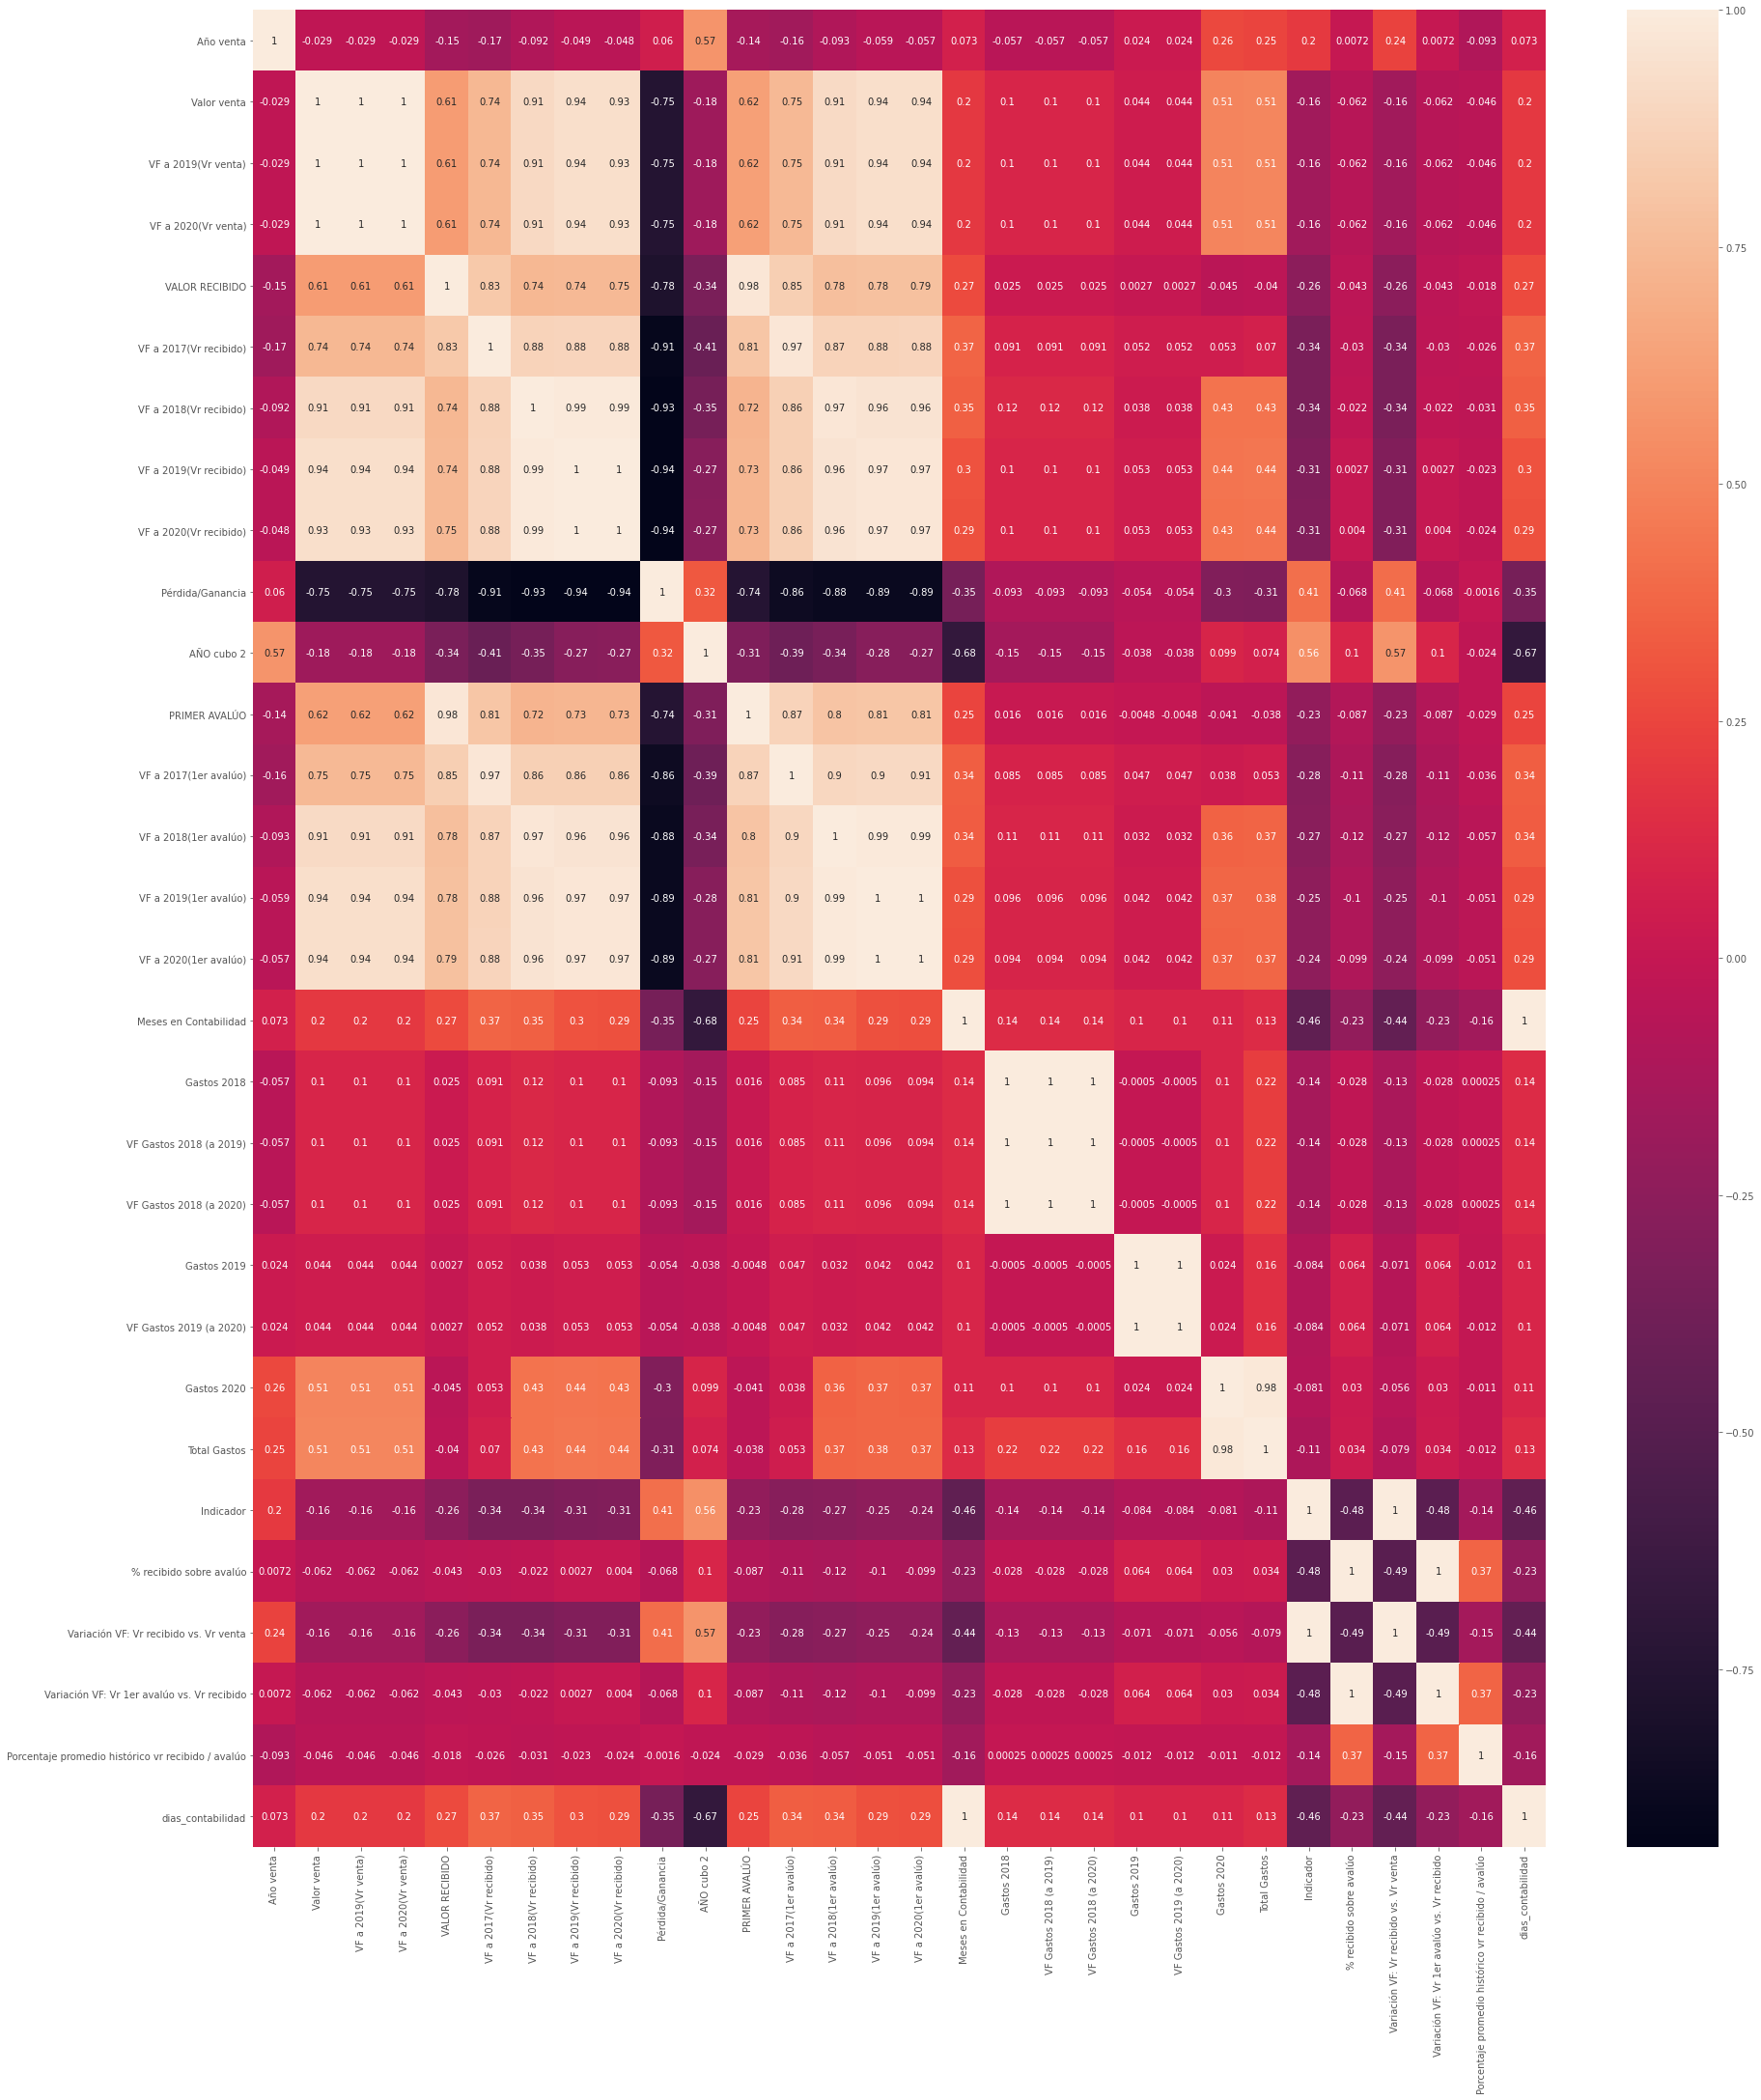

In [12]:
f = plt.figure(figsize=(30, 35))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Selección de los valores reales para tomar las features

In [13]:
def replace_valores(a,b,c,d,e):
  if (a==0) and (b!=0):
    a=b
    return a
  if (a==0) and (b==0) and (c!=0):
    a=c
    return a
  if (a==0) and (b==0) and (c==0) and (d!=0):
    a=d
    return d
  if (a==0) and (b==0) and (c==0) and (d==0) and (e!=0):
    a=e
    return a
  else:
    return a


In [14]:
df['VALOR_RECIBIDO_REAL']=df.apply(lambda x: replace_valores(x['VALOR RECIBIDO'], x['VF a 2017(Vr recibido)'], x['VF a 2018(Vr recibido)'], x['VF a 2019(Vr recibido)'], x['VF a 2020(Vr recibido)']), axis=1)
df['AVALUO_REAL']=df.apply(lambda x: replace_valores(x['PRIMER AVALÚO'], x['VF a 2017(1er avalúo)'], x['VF a 2018(1er avalúo)'], x['VF a 2019(1er avalúo)'], x['VF a 2020(1er avalúo)']), axis=1)
df['GASTOS_REAL']=df['Gastos 2018']+df['Gastos 2019']+ df['Gastos 2020']
df['perdida_ganancia']=df['Valor venta']-df['VALOR_RECIBIDO_REAL']
df['indicador']=(df['Valor venta']-df['GASTOS_REAL'])/df['VALOR_RECIBIDO_REAL']
df['indicador']=df['indicador'].apply(lambda x: round(x,2))
df['genera_ganancia']=df['indicador'].apply(lambda x: 1 if x >=0.95 else 0)

Eliminar datos muy correlacionados

In [15]:
lista_columns=['Año venta','VF Gastos 2018 (a 2020)', 'VF a 2019(Vr venta)', 'VF a 2020(Vr venta)', 'TIPO BIEN', 'VALOR RECIBIDO', 'VF a 2017(Vr recibido)', 'VF a 2018(Vr recibido)' , 'VF a 2019(Vr recibido)', 'VF a 2020(Vr recibido)', 'Pérdida/Ganancia', 'PRIMER AVALÚO', 'VF a 2017(1er avalúo)', 'VF a 2018(1er avalúo)', 'VF a 2019(1er avalúo)', 'VF a 2020(1er avalúo)', 'Gastos 2018', 'VF Gastos 2018 (a 2019)', 'VF Gastos 2019 (a 2020)', 'Gastos 2019', 'VF Gastos 2019 (a 2020)', 'Gastos 2020', 'Total Gastos', 'Indicador', '% recibido sobre avalúo', 'Variación VF: Vr recibido vs. Vr venta', 'Variación VF: Vr 1er avalúo vs. Vr recibido', 'Porcentaje promedio histórico vr recibido / avalúo' ]
df=df.drop(lista_columns, axis=1)

Análisis de las variables de interés

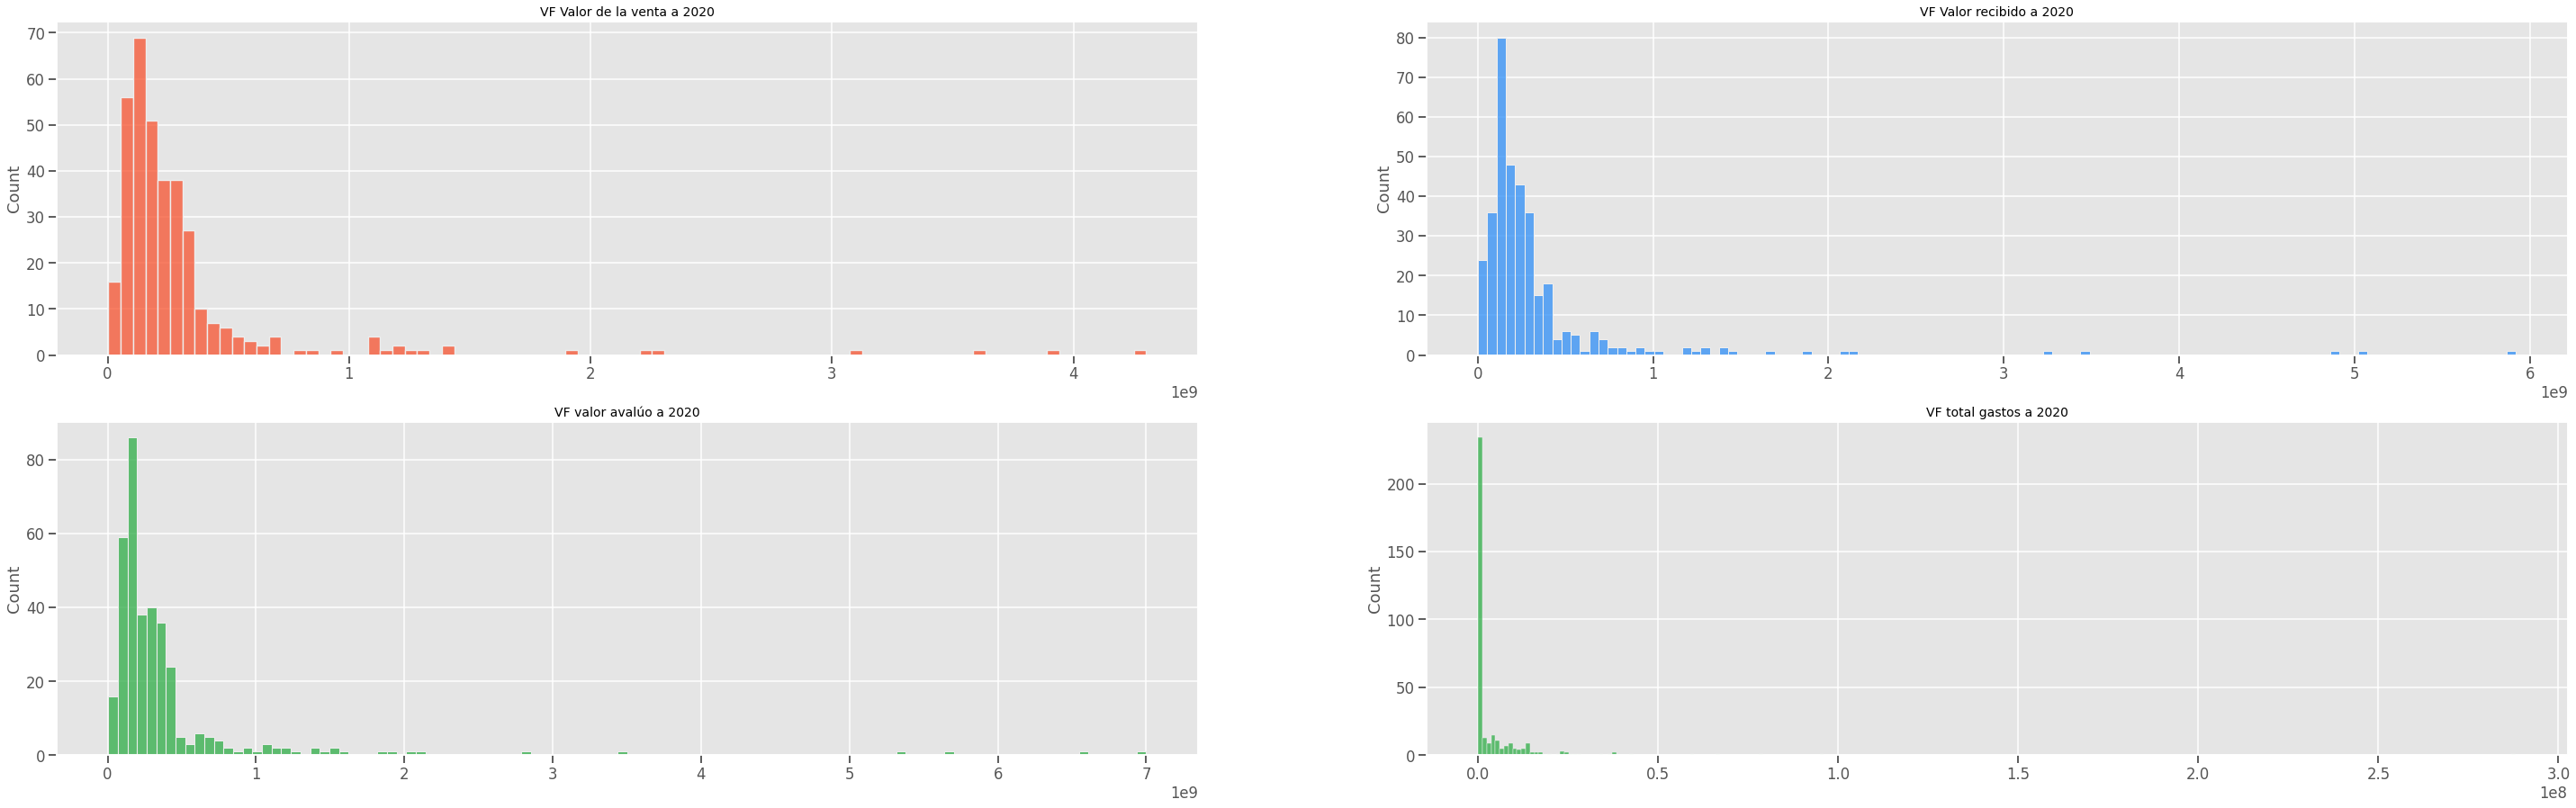

In [16]:
sns.set_context("talk")

fig, ax = plt.subplots(2, 2, figsize=(50,15))

valor_venta= df["Valor venta"].values
valor_recibido = df["VALOR_RECIBIDO_REAL"].values
valor_avaluo = df["AVALUO_REAL"].values
total_gastos =df["GASTOS_REAL"].values


sns.histplot(valor_venta, ax=ax[0,0], color="#F7522F")
ax[0,0].set_title("VF Valor de la venta a 2020", fontsize=14)
sns.histplot(valor_recibido, ax=ax[0,1], color="#2F8FF7")
ax[0,1].set_title("VF Valor recibido a 2020", fontsize=14)
sns.histplot(valor_avaluo, ax=ax[1,0], color="#2EAD46")
ax[1,0].set_title("VF valor avalúo a 2020", fontsize=14)
sns.histplot(total_gastos, ax=ax[1,1], color="#2EAD46")
ax[1,1].set_title("VF total gastos a 2020", fontsize=14);

Text(0, 0.5, 'Total gastos')

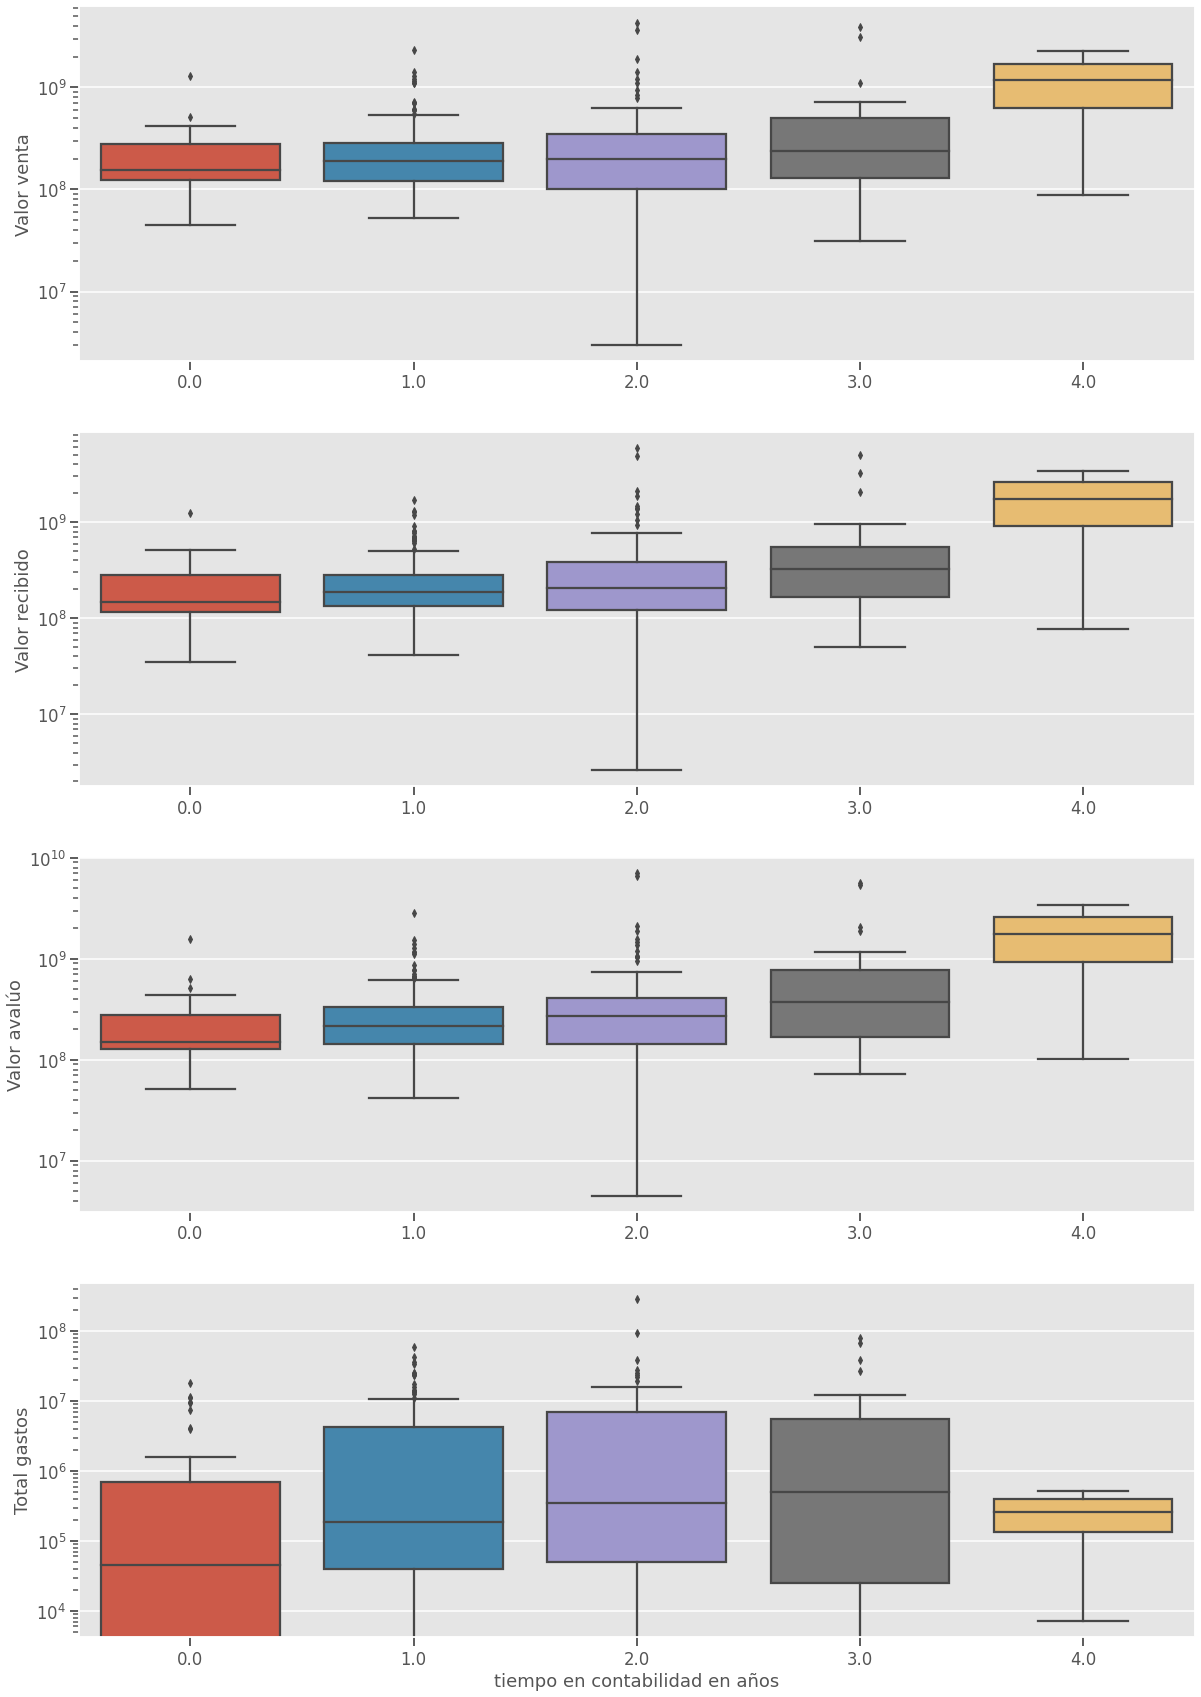

In [17]:
df['años_venta']=df['Meses en Contabilidad'].apply(lambda x: round(x/12,0))
fig, ax=plt.subplots(4,1, figsize=(20,30))
sns.boxplot(y="Valor venta", x='años_venta', data=df, ax=ax[0]).set_yscale('log')
ax[0].set_xlabel(' ')
sns.boxplot(y='VALOR_RECIBIDO_REAL', x ='años_venta', data = df, ax=ax[1]).set_yscale('log')
ax[1].set_ylabel('Valor recibido')
ax[1].set_xlabel(' ')
sns.boxplot(y='AVALUO_REAL', x='años_venta', data=df, ax=ax[2]).set_yscale('log')
ax[2].set_ylabel('Valor avalúo')
ax[2].set_xlabel(' ')
sns.boxplot(y='GASTOS_REAL', x='años_venta', data=df, ax=ax[3]).set_yscale('log')
ax[3].set_xlabel('tiempo en contabilidad en años')
ax[3].set_ylabel('Total gastos')

Verificación de cantidades

In [18]:
df['Tipo de Bien Dir'].value_counts()

Apartamento    173
Casa           141
Bodega          11
Lote             7
Local            6
Finca            4
Parqueadero      4
Oficina          4
Depósito         1
Edificio         1
Name: Tipo de Bien Dir, dtype: int64

In [19]:
def agrupacion_tipo_bien(x):
  if  (x=='Depósito') | (x=='Edificio'):#(x=='Bodega')| | (x=='Finca') | (x=='Oficina') | (x=='Parqueadero') | (x=='Local')| (x=='Lote'):
    return 'Otros'
  else: 
    return x
def agrupacion_regional(x):
  if  ('San Andrés' in x) | ('Atlántico' in x) | ('Bolívar' in x) | ('Cesar' in x) | ('La Guajira' in x) | ('Magdalena' in x) | ('Córdoba' in x) | ('Sucre' in x) | ('Quindío' in x):
    return 'Región Norte'
  if ('Santander' in x) | ('Norte de Santander' in x):
    return 'Región Nororiental'
  if ('Arauca' in x) | ('Vichada' in x) | ('Casanare' in x) | ('Meta' in x):
    return 'Región Oriental'
  if ('Bogotá' in x) | ('Cundinamarca' in x) | ('Tolima' in x) | ('Huila' in x) | ('Boyacá' in x):
    return 'Región Central'
  if ('Cauca' in x) | ('Valle' in x)| ('Nariño' in x) | ('Choco' in x):
    return 'Región Occidental'
  if ('Caldas' in x) | ('Antioquia' in x) | ('Quindío' in x) | ('Risaralda' in x):
    return 'Región Noroccidental'
  if ('Cáqueta' in x) | ('Putumayo' in x) | ('Amazonas' in x)  | ('Vaupés' in x) | ('Guaviare' in x) | ('Guainía' in x):
    return 'Región Suroriental'
  else: 
    return x

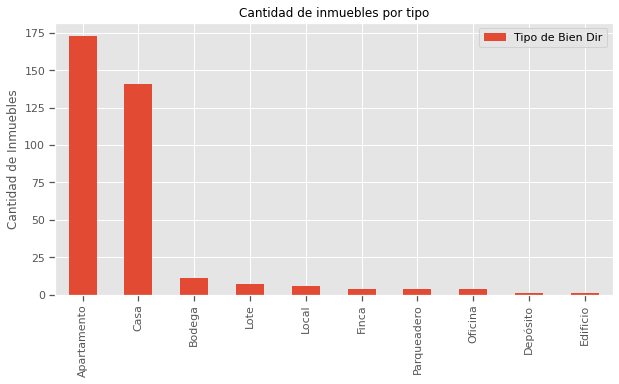

In [20]:
df=df.applymap(lambda x: x.strip( ) if type(x)==str else x)
sns.set_context("notebook")
pd.DataFrame(df['Tipo de Bien Dir'].value_counts()).plot(kind='bar')
plt.ylabel('Cantidad de Inmuebles')
plt.title('Cantidad de inmuebles por tipo');

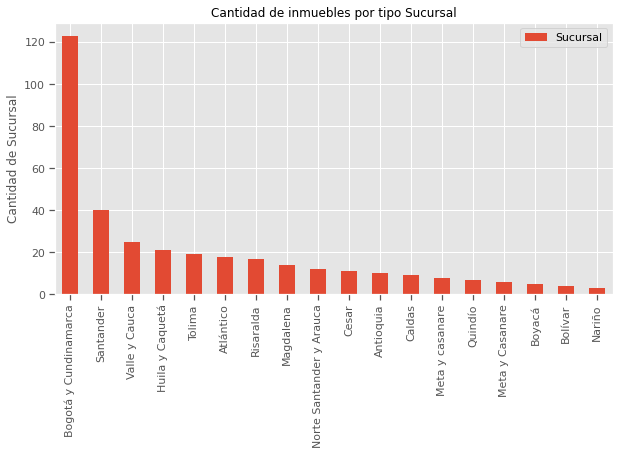

In [21]:
pd.DataFrame(df['Sucursal'].value_counts()).plot(kind='bar')
plt.ylabel('Cantidad de Sucursal')
plt.title('Cantidad de inmuebles por tipo Sucursal');

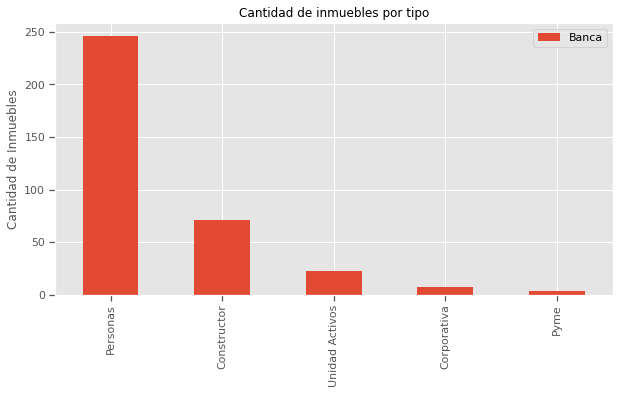

In [22]:
pd.DataFrame(df['Banca'].value_counts()).plot(kind='bar')
plt.ylabel('Cantidad de Inmuebles')
plt.title('Cantidad de inmuebles por tipo');

Agrupación de datos

In [23]:
df['Regional']=df['Sucursal'].apply(lambda x: agrupacion_regional(x))
df['Tipo de Bien Dir']=df['Tipo de Bien Dir'].apply(lambda x: agrupacion_tipo_bien(x))
df['Banca']=df.Banca.replace('Pyme', 'Unidad Activos')

In [24]:
df=df.drop(['Sucursal'], axis=1)

In [25]:
df['AÑO cubo 5']=df['Fecha cubo 5'].apply(lambda x: x.year)

Creación de nuevas variables

In [26]:
df['venta_2017']=df['AÑO cubo 5'].apply(lambda x: 1 if x==2017 else 0)
df['venta_2018']=df['AÑO cubo 5'].apply(lambda x: 1 if x==2018 else 0)
df['venta_2019']=df['AÑO cubo 5'].apply(lambda x: 1 if x==2019 else 0)
df['venta_2020']=df['AÑO cubo 5'].apply(lambda x: 1 if x==2020 else 0)

In [27]:
def semanas_periodo_tiempo(week, year):
  if year==2016:
    return week
  if year==2017:

    week=week+52
    return week
  if year==2018:
    
    week=week+104
    return week
  if year==2019:

    week=week+156
    return week
  if year==2020:
    
    week=week+208
    return week

In [28]:
df['week_cubo2']=df['Fecha cubo 2'].apply(lambda x: x.week)
df['week_cubo5']=df['Fecha cubo 5'].apply(lambda x: x.week)

In [29]:
df['weeks']=df.apply(lambda x: semanas_periodo_tiempo(x['week_cubo2'],x['AÑO cubo 2']),axis=1)
df['weeks_evento']=df.apply(lambda x: semanas_periodo_tiempo(x['week_cubo5'],x['AÑO cubo 5']),axis=1)

#Curvas de supervivencia por año

Funciones auxiliares para realizar las curvas de supervivencia

In [30]:
def group_year(year, df):
  if (year==2016) | (year==2017):
    df=df[(df['AÑO cubo 2']==2016) | ((df['AÑO cubo 2']==2017))]
    return df
  if year==2018:
    df=df[df['AÑO cubo 2']==year]
    return df
  if year==2019:
    df=df[df['AÑO cubo 2']==year]
    return df
  if year==2020:
    df=df[df['AÑO cubo 2']==year ]
    return df

######################################--------------------------------------#########################################################
def fit_regular_kmf(df, year,sell_year):
  kmf = KaplanMeierFitter()

  if ((year==2017) and (sell_year=='venta_2017'))| ((year==2018) and (sell_year=='venta_2018')) | ((year==2019) and (sell_year=='venta_2019')) | ((year==2020) and (sell_year=='venta_2020')):
    kmf.fit(durations=group_year(year,df)['weeks_evento'], event_observed=group_year(year,df)[sell_year])
    return kmf

  if (year==2017) and (sell_year=='venta_2018'):
    kmf.fit(durations=group_year(year,df)[group_year(year,df)['venta_2017']==0]['weeks_evento'], event_observed=group_year(year,df)[group_year(year,df)['venta_2017']==0][sell_year])
    return kmf
  
  if (year==2017) and (sell_year=='venta_2019'):
    kmf.fit(durations=group_year(year,df)[(group_year(year,df)['venta_2018']==0)& (group_year(year,df)['venta_2017']==0)]['weeks_evento'], event_observed=group_year(year,df)[(group_year(year,df)['venta_2018']==0) & (group_year(year,df)['venta_2017']==0)][sell_year])
    return kmf
  
  if ((year==2017) and (sell_year=='venta_2020')):
    kmf.fit(durations=group_year(year,df)[(group_year(year,df)['venta_2019']==0) & (group_year(year,df)['venta_2018']==0) & (group_year(year,df)['venta_2017']==0)]['weeks_evento'], event_observed=group_year(year,df)[(group_year(year,df)['venta_2019']==0) & (group_year(year,df)['venta_2018']==0) & (group_year(year,df)['venta_2017']==0)][sell_year])
    return kmf
  
  if (year==2018) and (sell_year=='venta_2019'):
    kmf.fit(durations=group_year(year,df)[group_year(year,df)['venta_2018']==0]['weeks_evento'], event_observed=group_year(year,df)[group_year(year,df)['venta_2018']==0][sell_year])
    return kmf
    
  if (year==2018) and (sell_year=='venta_2020'):
    kmf.fit(durations=group_year(year,df)[(group_year(year,df)['venta_2019']==0)& (group_year(year,df)['venta_2018']==0)]['weeks_evento'], event_observed=group_year(year,df)[(group_year(year,df)['venta_2019']==0)&(group_year(year,df)['venta_2018']==0)][sell_year])
    return kmf

  if (year==2019) and (sell_year=='venta_2020'):
    kmf.fit(durations=group_year(year,df)[group_year(year,df)['venta_2019']==0]['weeks_evento'], event_observed=group_year(year,df)[group_year(year,df)['venta_2019']==0][sell_year])
    return kmf



Manera corta de agrupación por categoría

In [118]:

def categoria_func(año,week_start, week_end,var_group, df,año_i):
   sns.set_context("talk")

   if (año_i==2016) | (año_i==2017):
      df=df[(df['AÑO cubo 2']==2016) | (df['AÑO cubo 2']==2017)]
      df0=df[['weeks_evento',var_group]]
      df0['evento']=1
      df0=df0.sort_values(by='weeks_evento',ascending=True)

      fig, ax = plt.subplots(figsize=(9.5,6))
      kmf = KaplanMeierFitter()
      T =  df0['weeks_evento']
      E =  df0['evento']
      
      for tipo in  df0[var_group].unique():
        
          flag =  df0[var_group] == tipo
          if (len(E[flag])>0) and (len(T[flag]>0)):

            kmf.fit(T[flag], event_observed=E[flag], label=tipo)

            ax.plot(kmf.survival_function_, label=tipo)
            ax.set_xlim(week_start, week_end)
            ax.autoscale(axis='y',tight=False)
            
            ax.set_title('KMF por'+' '+var_group+' '+'para los Bienes ingresados en el año:'+' '+año)
            ax.set_xlabel('Semanas de estudio')
            ax.set_ylabel('Probabilidad(no venta)')

      plotly_fig = tls.mpl_to_plotly(fig, resize=True)

      return plotly_fig
   
   elif (año_i==2018) | (año_i==2019) | (año_i==2020):
    
      df=df[df['AÑO cubo 2']==año_i]
      df0=df[['weeks_evento',var_group]]
      df0['evento']=1
      df0=df0.sort_values(by='weeks_evento',ascending=True)

      fig, ax = plt.subplots(figsize=(9.5,6))
      kmf = KaplanMeierFitter()
      T =  df0['weeks_evento']
      E =  df0['evento']
      
      for tipo in  df0[var_group].unique():
        
          flag =  df0[var_group] == tipo
          if (len(E[flag])>0) and (len(T[flag]>0)):

            kmf.fit(T[flag], event_observed=E[flag], label=tipo)

            ax.plot(kmf.survival_function_, label=tipo)
            ax.set_xlim(week_start, week_end)
            ax.autoscale(axis='y',tight=False)
            
            ax.set_title('KMF por'+' '+var_group+' '+'para los Bienes ingresados en el año:'+' '+año)
            ax.set_xlabel('Semanas de estudio')
            ax.set_ylabel('Probabilidad(no venta)')

      plotly_fig = tls.mpl_to_plotly(fig, resize=True)
      return plotly_fig
   
   elif (año_i!=2016) & (año_i!=2017) & (año_i!=2018) & (año_i!=2019) & (año_i!=2020):

      df0=df
      df0=df[['weeks_evento',var_group]]
      df0['evento']=1
      df0=df0.sort_values(by='weeks_evento',ascending=True)

      fig, ax = plt.subplots(figsize=(15,6.5))
      kmf = KaplanMeierFitter()
      T =  df0['weeks_evento']
      E =  df0['evento']
      
      for tipo in  df0[var_group].unique():
        
          flag =  df0[var_group] == tipo
          if (len(E[flag])>0) and (len(T[flag]>0)):

            kmf.fit(T[flag], event_observed=E[flag], label=tipo)

            ax.plot(kmf.survival_function_, label=tipo)
            ax.set_xlim(week_start, week_end)
            ax.autoscale(axis='y',tight=False)
            
            ax.set_title('KMF por'+' '+var_group+' '+'para los Bienes ingresados entre los años:'+' '+año)
            ax.set_xlabel('Semanas de estudio')
            ax.set_ylabel('Probabilidad(no venta)')

      plotly_fig = tls.mpl_to_plotly(fig, resize=True)


      return plotly_fig

In [119]:
dic_fig_2017_region={}
lista_scale=[(0,104),(104,156),(156,208),(209,260)]
labels_2017=['kmf_2017_1','kmf_2017_2','kmf_2017_3','kmf_2017_4']
k=0
for i in labels_2017:
  dic_fig_2017_region[i]=categoria_func('2016 y 2017',lista_scale[k][0],lista_scale[k][1],'Regional',df,2017)
  k=k+1

dic_fig_2017_inmueble={}
lista_scale=[(0,104),(104,156),(156,208),(209,260)]
labels_2017=['kmf_2017_1','kmf_2017_2','kmf_2017_3','kmf_2017_4']
k=0
for i in labels_2017:
  dic_fig_2017_inmueble[i]=categoria_func('2016 y 2017',lista_scale[k][0],lista_scale[k][1],'Tipificación',df,2017)
  k=k+1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecati

In [33]:
def plotly_fig(kmf,s , week_start, week_end, prob_anterior):
  
  sns.set_context("talk")

  if (s==2016) or (s==2017):
      fig, ax = plt.subplots(figsize=(9.5,6))
      y= (kmf.confidence_interval_['KM_estimate_lower_0.95'].values)*prob_anterior
      y1=(kmf.confidence_interval_['KM_estimate_upper_0.95'].values)*prob_anterior
      x=kmf.confidence_interval_.index.values
      ax.plot((kmf.survival_function_)*prob_anterior, label='Estimación kmf')
      ax.plot((kmf.confidence_interval_)*prob_anterior, alpha=0.3,label='I-confianza')
      ax.fill_between(x,y, y1, 'lightgrey', alpha=0.1)
      ax.set_xlim(week_start, week_end)
      #ax.set_ylim(y_start, y_end)
      ax.set_title('Estimación KMF para los Bienes ingresados en el año: 2016 y 2017')
      ax.set_xlabel('Semanas de estudio')
      ax.set_ylabel('Probabilidad(no venta)')
      plotly_fig = tls.mpl_to_plotly(fig, resize=True)
      return plotly_fig
  
  if (s==2018) or (s==2019) or (s==2020):
    fig, ax = plt.subplots(figsize=(9.5,6))
    y=(kmf.confidence_interval_['KM_estimate_lower_0.95'].values)*prob_anterior
    y1=(kmf.confidence_interval_['KM_estimate_upper_0.95'].values)*prob_anterior
    x=(kmf.confidence_interval_.index.values)*prob_anterior
    ax.plot((kmf.survival_function_)*prob_anterior, label='Estimación kmf')
    ax.plot((kmf.confidence_interval_)*prob_anterior, alpha=0.3,label='I-confianza')
    ax.fill_between(x,y, y1, 'lightgrey', alpha=0.1)
    #ax.set_xlim(week_start, week_end)
    ax.set_title('Estimación KMF para los Bienes ingresados en el año:'+' '+str(s))
    ax.set_xlabel('Semanas de estudio')
    ax.set_xlim(week_start, week_end)
    #ax.set_ylim(y_start, y_end)
    ax.set_ylabel('Probabilidad(no venta)')
    plotly_fig = tls.mpl_to_plotly(fig, resize=True)
    return plotly_fig

  if type(s)==str:
    fig, ax = plt.subplots(figsize=(15,6.5))
    y=(kmf.confidence_interval_['KM_estimate_lower_0.95'].values)*prob_anterior
    y1=(kmf.confidence_interval_['KM_estimate_upper_0.95'].values)*prob_anterior
    x=(kmf.confidence_interval_.index.values)*prob_anterior
    ax.plot((kmf.survival_function_)*prob_anterior, label='Estimación kmf')
    ax.plot((kmf.confidence_interval_)*prob_anterior, alpha=0.3,label='I-confianza')
    ax.fill_between(x,y, y1, 'lightgrey', alpha=0.1)
    #ax.set_xlim(week_start, week_end)
    ax.set_title('Estimación KMF para los Bienes ingresados entre los años:'+' '+s, loc='center')
    ax.set_xlabel('Semanas de estudio')
    ax.set_xlim(week_start, week_end)
    #ax.set_ylim(y_start, y_end)
    ax.set_ylabel('Probabilidad(no venta)')
    plotly_fig = tls.mpl_to_plotly(fig, resize=True)
    return plotly_fig

In [117]:
#2017
sns.set_context("talk")

kmf_2017_1=fit_regular_kmf(df,2017,'venta_2017')
kmf_2017_2=fit_regular_kmf(df,2017,'venta_2018')
kmf_2017_3=fit_regular_kmf(df,2017,'venta_2019')
kmf_2017_4=fit_regular_kmf(df,2017,'venta_2020')
kmf_2017=[kmf_2017_1,kmf_2017_2,kmf_2017_3,kmf_2017_4]
labels_2017=['kmf_2017_1','kmf_2017_2','kmf_2017_3','kmf_2017_4']
prob_anterior=[1, kmf_2017_1.survival_function_.iloc[-1][0],(kmf_2017_2.survival_function_.iloc[-1][0])*(kmf_2017_1.survival_function_.iloc[-1][0]), (kmf_2017_3.survival_function_.iloc[-1][0])*(kmf_2017_2.survival_function_.iloc[-1][0])*(kmf_2017_1.survival_function_.iloc[-1][0])]
dic_fig_2017={}
intervalos=[(0,105),(105,158),(157,210), (209,261)]
j=0
k=0
p=0
for i in labels_2017:
   dic_fig_2017[i]=plotly_fig(kmf_2017[j],2017,intervalos[k][0],intervalos[k][1],prob_anterior[p])
   j=j+1
   k=k+1
   p=p+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning:

The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/renderer.py:474: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates



In [35]:
dic_tables_2017={}
k=0
for i in labels_2017:
  dic_tables_2017[i]=kmf_2017[k].event_table
  k=k+1



In [36]:
for name, df0 in dic_tables_2017.items():
  df0.reset_index(inplace=True)
  dic_tables_2017[name]=df0

Análisis 2018

In [37]:
dic_fig_2018_region={}
lista_scale=[(104,156),(156,208),(209,260)]
labels_2018=['kmf_2018_1','kmf_2018_2','kmf_2018_3']
k=0
for i in labels_2018:
  dic_fig_2018_region[i]=categoria_func('2018',lista_scale[k][0],lista_scale[k][1],'Regional',df,2018)
  k=k+1

dic_fig_2018_inmueble={}
lista_scale=[(104,156),(156,208),(209,260)]
labels_2018=['kmf_2018_1','kmf_2018_2','kmf_2018_3']
k=0
for i in labels_2018:
  dic_fig_2018_inmueble[i]=categoria_func('2018',lista_scale[k][0],lista_scale[k][1],'Tipificación',df,2018)
  k=k+1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDepreca

In [38]:
#2018
kmf_2018_1=fit_regular_kmf(df,2018,'venta_2018')
kmf_2018_2=fit_regular_kmf(df,2018,'venta_2019')
kmf_2018_3=fit_regular_kmf(df,2018,'venta_2020')
kmf_2018=[kmf_2018_1,kmf_2018_2,kmf_2018_3]

labels_2018=['kmf_2018_1','kmf_2018_2','kmf_2018_3']
prob_anterior=[1, kmf_2018_1.survival_function_.iloc[-1][0],(kmf_2018_2.survival_function_.iloc[-1][0])*(kmf_2018_1.survival_function_.iloc[-1][0])]
dic_fig_2018={}
intervalos=[(104,158),(157,210), (209,261)]
j=0
k=0
p=0
for i in labels_2018:
   dic_fig_2018[i]=plotly_fig(kmf_2018[j],2018,intervalos[k][0],intervalos[k][1],prob_anterior[p])
   j=j+1
   k=k+1
   p=p+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning:

The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/renderer.py:474: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates



In [39]:
dic_tables_2018={}
k=0
for i in labels_2018:
  dic_tables_2018[i]=kmf_2018[k].event_table
  k=k+1


In [40]:
for name, df0 in dic_tables_2018.items():
  df0.reset_index(inplace=True)
  dic_tables_2018[name]=df0

Análisis 2019

In [41]:
dic_fig_2019_region={}
lista_scale=[(156,208),(209,260)]
labels_2019=['kmf_2019_1','kmf_2019_2']
k=0
for i in labels_2019:
  dic_fig_2019_region[i]=categoria_func('2019',lista_scale[k][0],lista_scale[k][1],'Regional',df,2019)
  k=k+1

dic_fig_2019_inmueble={}
lista_scale=[(156,208),(209,260)]
labels_2019=['kmf_2019_1','kmf_2019_2']
k=0
for i in labels_2019:
  dic_fig_2019_inmueble[i]=categoria_func('2019',lista_scale[k][0],lista_scale[k][1],'Tipificación',df,2019)
  k=k+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDepreca

In [42]:
#2019
kmf_2019_1=fit_regular_kmf(df,2019,'venta_2019')
kmf_2019_2=fit_regular_kmf(df,2019,'venta_2020')

kmf_2019=[kmf_2019_1,kmf_2019_2]

labels_2019=['kmf_2019_1','kmf_2019_2']
prob_anterior=[1, kmf_2019_1.survival_function_.iloc[-1][0]]
dic_fig_2019={}
intervalos=[(157,210), (209,260)]
j=0
k=0
p=0
for i in labels_2019:
   dic_fig_2019[i]=plotly_fig(kmf_2019[j],2019,intervalos[k][0],intervalos[k][1],prob_anterior[p])
   j=j+1
   k=k+1
   p=p+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning:

The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/renderer.py:474: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates



In [43]:
dic_tables_2019={}
k=0
for i in labels_2019:
  dic_tables_2019[i]=kmf_2019[k].event_table
  k=k+1

In [44]:
for name, df0 in dic_tables_2019.items():
  df0.reset_index(inplace=True)
  dic_tables_2019[name]=df0

Análisis 2020

In [45]:
#2020
kmf_2020_1=fit_regular_kmf(df,2020,'venta_2020')


kmf_2020=[kmf_2020_1]

labels_2020=['kmf_2020_1']
prob_anterior=[1]
dic_fig_2020={}
intervalos=[(209,260)]
j=0
k=0
p=0
for i in labels_2020:
   dic_fig_2020[i]=plotly_fig(kmf_2020[j],2020,intervalos[k][0],intervalos[k][1],prob_anterior[p])
   j=j+1
   k=k+1
   p=p+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning:

The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/renderer.py:474: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates



In [46]:
dic_fig_2020_region={}
lista_scale=[(209,260)]
labels_2019=['kmf_2020_1']
k=0
for i in labels_2020:
  dic_fig_2020_region[i]=categoria_func('2020',lista_scale[k][0],lista_scale[k][1],'Regional',df,año_i=2020)
  k=k+1

dic_fig_2020_inmueble={}
lista_scale=[(209,260)]
labels_2020=['kmf_2020_1']
k=0
for i in labels_2020:
  dic_fig_2020_inmueble[i]=categoria_func('2020',lista_scale[k][0],lista_scale[k][1],'Tipificación',df,año_i=2020)
  k=k+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDepreca

In [47]:
dic_tables_2020={}
k=0
for i in labels_2020:
  dic_tables_2020[i]=kmf_2020[k].event_table
  k=k+1

In [48]:
for name, df0 in dic_tables_2020.items():
  df0.reset_index(inplace=True)
  dic_tables_2020[name]=df0

#Análisis continuo SI ES NECESARIO!!!!!!!

In [102]:
df_eventos=df[['weeks_evento']]
df_eventos['evento']=1
df_eventos=df_eventos.sort_values(by='weeks_evento',ascending=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [103]:
kmf_general = KaplanMeierFitter()
kmf_general.fit(durations=df_eventos['weeks_evento'], event_observed=df_eventos['evento'])

plotly_fig(kmf_general,'2016 y 2020',0,260,1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning:

The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/renderer.py:474: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates



#Cox Análisis

In [49]:
from lifelines import CoxPHFitter
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [50]:
df['evento']=1

In [51]:
df.head(1)

,NIBP,Mes venta,Valor venta,Banca,Tipo de Bien Dir,Tipificación,Fecha cubo 2,Fecha cubo 5,AÑO cubo 2,Meses en Contabilidad,dias_contabilidad,VALOR_RECIBIDO_REAL,AVALUO_REAL,GASTOS_REAL,perdida_ganancia,indicador,genera_ganancia,años_venta,Regional,AÑO cubo 5,venta_2017,venta_2018,venta_2019,venta_2020,week_cubo2,week_cubo5,weeks,weeks_evento,evento
0,03-9323,Jun,220000000,Personas,Apartamento,Vivienda,2017-07-04 02:00:00,2018-06-28 02:00:00,2017,11.966667,359,233016000.0,233016000.0,432661.0,-13016000.0,0.94,0,1.0,Región Noroccidental,2018,0,1,0,0,27,26,79,130,1


In [52]:
dfcox=df[['evento','Tipo de Bien Dir','weeks_evento','AVALUO_REAL','indicador','Banca','Regional','años_venta','Tipificación']]
dfcox=dfcox.rename(columns={'años_venta':'años_en_contabilidad'})

#ENCODING
dfcox_cat=dfcox.select_dtypes(include='object')
cat_val0= list(dfcox_cat.columns)
for cat_val in cat_val0:
  dfcox[cat_val]=ord_enc.fit_transform(dfcox[[cat_val]])

In [53]:
#Dectectar Multicolinealidad
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfcox.values, i) for i in range(dfcox.values.shape[1])]
vif["features"] = dfcox.columns
print(vif.round(1))

   VIF Factor              features
0        95.0                evento
1         1.8      Tipo de Bien Dir
2         1.1          weeks_evento
3         1.3           AVALUO_REAL
4         1.1             indicador
5         1.1                 Banca
6         1.2              Regional
7         1.2  años_en_contabilidad
8         2.2          Tipificación


In [54]:
cph=CoxPHFitter()
cph.fit(dfcox, duration_col='weeks_evento', event_col='evento',strata=['Tipificación'])

<lifelines.CoxPHFitter: fitted with 352 total observations, 0 right-censored observations>

In [55]:
cph.check_assumptions(dfcox,show_plots=True)

Proportional hazard assumption looks okay.


[]

In [56]:
cph.concordance_index_

0.596844981782047

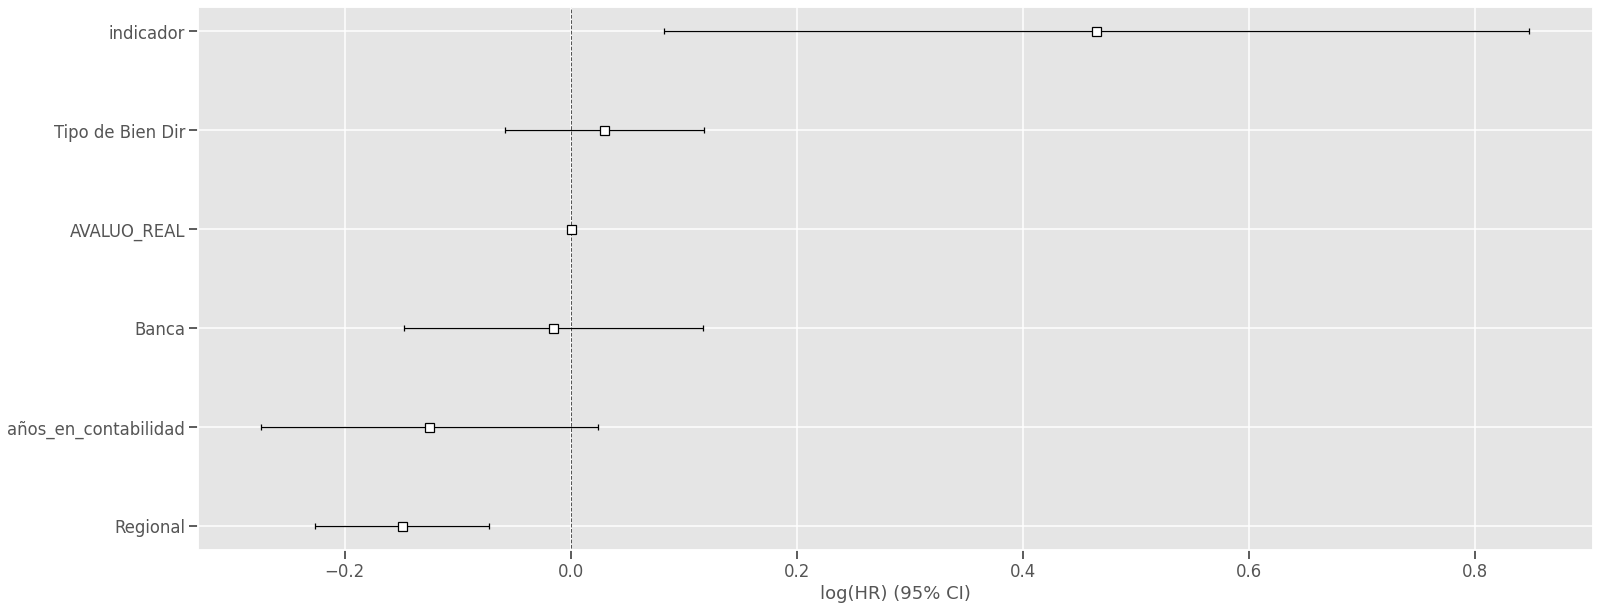

In [157]:
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(25,10))
cph.plot()  
plt.savefig('coxe_results_general.png')



#DASH

In [58]:
 pip install jupyter-dash

     |████████████████████████████████| 51kB 3.9MB/s 


In [59]:
!pip install dash_defer_js_import

  Created wheel for dash-defer-js-import: filename=dash_defer_js_import-0.0.2-cp36-none-any.whl size=38901 sha256=fcaf69ac7c5b05ad69ba6fbe61ffe1bf315011165224294997f76cfb5e8e3d05
  Stored in directory: /root/.cache/pip/wheels/4c/b6/17/986e72c784903ff8804d6c728ed95ae3529ed4f0de7c996111
Successfully built dash-defer-js-import


In [60]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import dash_defer_js_import as dji
import re
import urllib.parse

In [61]:
JupyterDash.infer_jupyter_proxy_config()

In [170]:
def convert(text):
    def toimage(x):
        if x[1] and x[-2] == r'$':
            x = x[2:-2]
            img = "\n<img src='https://math.now.sh?from={}' style='display: block; margin: 0.5em auto;'>\n"
            return img.format(urllib.parse.quote_plus(x))
        else:
            x = x[1:-1]
            return r'![](https://math.now.sh?from={})'.format(urllib.parse.quote_plus(x))
    return re.sub(r'\${2}([^$]+)\${2}|\$(.+?)\$', lambda x: toimage(x.group()), text)

Markdown_text = r"""
  
$\hat{S}(t_i)=\prod_{t_i\leq}\frac{n_i-d_i}{n_i}$


En donde:


$\hat{S}(t_i)$= Es la probabilidad de que no se venda un inmueble en el tiempo $t_i$.


$n_i$= Número de inmuebles que no se vendieron hasta el tiempo $t_i$.


$d_i$= Es el númeor de inmuebles vendidos hasta el tiempo $t_i$.

"""

Markdown_text1 = r"""
  
$\hat{S}(t_i)=\hat{S}(t_i-1)(1-\frac{d_i}{n_i})$


$\hat{S}(n)=\hat{S}_0*\hat{S}_1*\hat{S}_2...\hat{S}_n$




"""

Markdown_text2 = r"""
  $h(x|t)=b_0(t)* \exp(\sum_{i=1}^nb_i*x_i) \qquad \qquad (1)$ 
  
  En donde:
  
  $x_i$: Es la variable de interés, tal como: tipo de inmueble, región, banca.


  $b_0(t)$ se conoce como riesgo base y corresponde al riesgo de vender el inmueble cuando cada $x_i=0$.
  """



Markdown_text3 = r"""
  $p< 0.05$, podemos evaluar la relevancia estadística que tiene cada una de las variables $x_i$.

  A partir de la ecuación (1) podemos definir:

  $HR=\exp(b_i)$
 
  A partir del valor de $HR$ se puede evaluar el efecto de cada variable en el tiempo de supervivencia de un inmueble:

  $HR=1$ La variable no tiene ningún efecto.

  $HR< 1$ Se reduce el riesgo de que el evento ocurra.

  $HR>1$ Aumenta el riesgo de que el evento ocurra.
  """


Markdown_text = convert(Markdown_text)

Markdown_text1 = convert(Markdown_text1)

Markdown_text2 = convert(Markdown_text2)

Markdown_text3 = convert(Markdown_text3)


In [171]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)



server = app.server
colors = {
    'background': '#111111',
    'text': '#EE1A26',
    'subtext':'slategray'
    ,'title':'gray'
}

def generate_table(dic_tables_2017, max_rows=25):
    return html.Table([
        html.Thead(
            html.Tr([html.Th(col) for col in dic_tables_2017.columns])
        ),
        html.Tbody([
            html.Tr([
                html.Td(dic_tables_2017.iloc[i][col]) for col in dic_tables_2017.columns
            ]) for i in range(min(len(dic_tables_2017), max_rows))
        ])
    ])

################################layout aplicación#############################

app.layout =html.Div([
    dcc.Tabs(id="tabs-styled-with-props", value='tab-1', children=[
                                                                   
        dcc.Tab(label='Análisis general', value='tab-1'),                                                          
        dcc.Tab(label='Fecha de cubo 2: 2016 y 2017', value='tab-2'),
        dcc.Tab(label='Fecha de cubo 2: 2018', value='tab-3'),
        dcc.Tab(label='Fecha de cubo 2: 2019', value='tab-4'),
        dcc.Tab(label='Fecha de cubo 2: 2020', value='tab-5'),
    ], colors={
        "border": "white",
        "primary": "gold",
        "background": "cornsilk"
    }),
    html.Div(id='tabs-content-props')
    
  
])
####################################################################################################################

# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    Input("colorscale-dropdown", "value")
)
def update_figure(value):
  if (value=='kmf_2017_1') | (value=='kmf_2017_2') | (value=='kmf_2017_3') | (value=='kmf_2017_4'): 
    return dic_fig_2017[value]

  if (value=='kmf_2018_1') | (value=='kmf_2018_2') | (value=='kmf_2018_3'): 
    return dic_fig_2018[value]
  
  if (value=='kmf_2019_1') | (value=='kmf_2019_2'): 
    return dic_fig_2019[value]
  
  if (value=='kmf_2020_1'): 
    return dic_fig_2020[value]

@app.callback(
    Output('graph1', 'figure'),
    Input("colorscale-dropdown", "value")
)
def update_figure_1(value):
  if (value=='kmf_2017_1') | (value=='kmf_2017_2') | (value=='kmf_2017_3') | (value=='kmf_2017_4'): 
    return dic_fig_2017_region[value]

  if (value=='kmf_2018_1') | (value=='kmf_2018_2') | (value=='kmf_2018_3'): 
    return dic_fig_2018_region[value]

  if (value=='kmf_2019_1') | (value=='kmf_2019_2'): 
    return dic_fig_2019_region[value]
  
  if (value=='kmf_2020_1'): 
    return dic_fig_2020_region[value]
  
  

@app.callback(
    Output('graph2', 'figure'),
    Input("colorscale-dropdown", "value")
)
def update_figure_2(value):
  if (value=='kmf_2017_1') | (value=='kmf_2017_2') | (value=='kmf_2017_3') | (value=='kmf_2017_4'): 
    return dic_fig_2017_inmueble[value]
  if (value=='kmf_2018_1') | (value=='kmf_2018_2') | (value=='kmf_2018_3'): 
    return dic_fig_2018_inmueble[value]

  if (value=='kmf_2019_1') | (value=='kmf_2019_2'): 
    return dic_fig_2019_inmueble[value]   
  if (value=='kmf_2020_1'): 
    return dic_fig_2020_inmueble[value]

@app.callback(Output('table-container', 'children'), [Input('colorscale-dropdown', 'value')])

def update_table(value):
  if (value=='kmf_2017_1') | (value=='kmf_2017_2') | (value=='kmf_2017_3') | (value=='kmf_2017_4'): 
    dff = dic_tables_2017[value] # update with your own logic
    return generate_table(dff)
  
  if (value=='kmf_2018_1') | (value=='kmf_2018_2') | (value=='kmf_2018_3'): 
    dff = dic_tables_2018[value] 
    return generate_table(dff)

  if (value=='kmf_2019_1') | (value=='kmf_2019_2'): 
    dff = dic_tables_2019[value] 
    return generate_table(dff)

  if (value=='kmf_2020_1'): 
    dff = dic_tables_2020[value] 
    return generate_table(dff)


@app.callback(Output('tabs-content-props', 'children'),
              Input('tabs-styled-with-props', 'value'))

##########################################################################################

def render_content(tab):

##########################################################################################
    
    if tab == 'tab-1':
        return html.Div([html.H1(
        children='Dash: Davivienda',
        style={
            'textAlign': 'center',
             'color': colors['text']
        }
    ),
    html.Div(children='Análisis de supervivencia para los inmuebles ingresados al banco entre los años 2016 y 2020', style={
        'textAlign': 'center',
        'color': colors['subtext']
    }),
   

    html.Div(children='Estimador de Kaplan-Meier:', style={
        'textAlign': 'left',
        'color':'black'
    }),

    html.Div(children='Para realizar los análisis de supervivencia usamos la teoría relacionada con los estimadores de Kaplan-Meier. La probabilidad de supervivencia, en este caso de un inmueble, en un tiempo t se denota como S(t) y se calcula a partir de la siguiente ecuación:', style={
       'textAlign': 'left',
        'color': colors['title']
    }),
    html.Div( dcc.Markdown(Markdown_text, dangerously_allow_html=True),style={'width': '100%', 'float': 'center', 'display': 'inline-block','textAlign': 'left',
        'color': colors['title']}),
    
    html.Div(children='La anterior ecuación se puede reescribir de otra forma y así obtener una mejor interpretación:', style={
        'textAlign': 'left',
        'color': colors['title']
    }),
    html.Div( dcc.Markdown(Markdown_text1, dangerously_allow_html=True),style={'width': '100%', 'float': 'center', 'display': 'inline-block','textAlign': 'left',
        'color': colors['title']}),

    html.Div(children='A continuación presentamos los resultados del análisis de supervivencia para todos los inmuebles ingresados y vendidos entre los años 2016 y 2020:',style={'textAlign': 'center',
        'color': colors['title']}),
    dcc.Graph(
        id='general_1',
        figure=plotly_fig(kmf_general,'2016 y 2020',0,260,1)),
    dcc.Graph(
        id='general_1_regional',
        figure=categoria_func('2016 y 2020',0,260,'Regional',df,2010)
    ),
    
    dcc.Graph(
        id='general_1_tipo_inm',
        figure=categoria_func('2016 y 2020',0,260,'Tipificación',df,2010)
    ),
    html.Div(children='A continuación presentamos el efecto que tienen ciertas variables en el tiempo de supervivencia de un inmueble', style={'textAlign': 'center',
        'color': colors['title']}),
    html.Div(children='Modelo de riesgos proporcionales (Regresión de Cox):', style={
        'textAlign': 'left',
        'color':'black'
    }),
    html.Div( dcc.Markdown(Markdown_text2, dangerously_allow_html=True),style={'width': '100%', 'float': 'center', 'display': 'inline-block','textAlign': 'left',
        'color': colors['title']}),
    html.Div(children='Los resultados obtenidos para este análisis se muestran a continuación:', style={
        'textAlign': 'left',
        'color':colors['title']
    }),
    html.Embed(src='https://htmlpreview.github.io/?https://raw.githubusercontent.com/ancastillar/Aplicacion_deteccion_riesgo_inmuebles_Davivienda/main/cox_results_general', style={'width': '100%', 'float': 'center', 'display': 'inline-block'}),
    html.Img(src='https://raw.githubusercontent.com/ancastillar/Aplicacion_deteccion_riesgo_inmuebles_Davivienda/main/coxe_results_general.png', style={'width': '60%', 'float': 'right', 'display': 'inline-block'}),
    
    html.Div(children='¿Cómo interpretar los resultados?', style={
        'textAlign': 'left',
        'color':'black'
    }),
    html.Div( dcc.Markdown(Markdown_text3, dangerously_allow_html=True),style={'width': '40%', 'float': 'left', 'display': 'inline-block','textAlign': 'left',
        'color': colors['title']})
    ])
 
######################################################################################################################################        
    if tab == 'tab-2':
        return html.Div([html.H1(
        children='Dash: Davivienda',
        style={
            'textAlign': 'center',
             'color': colors['text']
        }
    ),

    html.Div(children='Análisis de supervivencia para los inmuebles ingresados al banco entre los años 2016 y 2017', style={
        'textAlign': 'center',
        'color': colors['subtext']
    }),
    html.Div([
      html.Label([
          "Selecciona el año de análisis de venta de los inmuebles",
          dcc.Dropdown(
              id='colorscale-dropdown', 
              options=[{'label': '2017', 'value':'kmf_2017_1'},{'label': '2018', 'value': 'kmf_2017_2'},{'label': '2019', 'value': 'kmf_2017_3'},{'label': '2020', 'value': 'kmf_2017_4'}]               
              ,value='kmf_2017_1')
      ])]),


    html.Div([html.Div(id='table-container', style={'width': '43%', 'float': 'right', 'display': 'inline-block'}),
            
    ]),
    dcc.Graph(id='graph'),
    dcc.Graph(id='graph1'),
    dcc.Graph(id='graph2'),

    ])
        
#########################################################################################################

    elif tab == 'tab-3':
        return html.Div([
            html.H1(
        children='Dash: Davivienda',
        style={
            'textAlign': 'center',
             'color': colors['text']
        }
    ),

    html.Div(children='Análisis de supervivencia para los inmuebles ingresados al banco en el año 2018', style={
        'textAlign': 'center',
        'color': colors['subtext']
    }),
    html.Div([
      html.Label([
          "Selecciona el año de análisis de venta de los inmuebles",
          dcc.Dropdown(
              id='colorscale-dropdown', 
              options=[{'label': '2018', 'value': 'kmf_2018_1'},{'label': '2019', 'value': 'kmf_2018_2'},{'label': '2020', 'value': 'kmf_2018_3'}]               
              ,value='kmf_2018_1')
      ])]),


    html.Div([html.Div(id='table-container', style={'width': '43%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    dcc.Graph(id='graph'),
    dcc.Graph(id='graph1'),
    dcc.Graph(id='graph2')
  
           
        ])


    elif tab == 'tab-4':
        return html.Div([
            html.H1(
        children='Dash: Davivienda',
        style={
            'textAlign': 'center',
             'color': colors['text']
        }
    ),

    html.Div(children='Análisis de supervivencia para los inmuebles ingresados al banco en el año 2019', style={
        'textAlign': 'center',
        'color': colors['subtext']
    }),
    html.Div([
      html.Label([
          "Selecciona el año de análisis de venta de los inmuebles",
          dcc.Dropdown(
              id='colorscale-dropdown', 
              options=[{'label': '2019', 'value': 'kmf_2019_1'},{'label': '2020', 'value': 'kmf_2019_2'}]               
              ,value='kmf_2019_1')
      ])]),


    html.Div([html.Div(id='table-container', style={'width': '43%', 'float': 'right', 'display': 'inline-block'}),
             ]),
    dcc.Graph(id='graph'),
    dcc.Graph(id='graph1'),
    dcc.Graph(id='graph2')
  
           
        ])
    elif tab == 'tab-5':
        return html.Div([
            html.H1(
        children='Dash: Davivienda',
        style={
            'textAlign': 'center',
             'color': colors['text']
        }
    ),

    html.Div(children='Análisis de supervivencia para los inmuebles ingresados al banco en el año 2020', style={
        'textAlign': 'center',
        'color': colors['subtext']
    }),
    html.Div([
      html.Label([
          "Selecciona el año de análisis de venta de los inmuebles",
          dcc.Dropdown(
              id='colorscale-dropdown', 
              options=[{'label': '2020', 'value': 'kmf_2020_1'}]               
              ,value='kmf_2020_1')
      ])]),


    html.Div([html.Div(id='table-container', style={'width': '43%', 'float': 'right', 'display': 'inline-block'}),
             ]),
    dcc.Graph(id='graph'),
    dcc.Graph(id='graph1'),
    dcc.Graph(id='graph2')
  
           
        ])
  
####################run app
app.run_server(mode='inline')





<IPython.core.display.Javascript object>